### CHARGEMENT DE LA BASE

In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importer le dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### PREPARATION DES DONNEES

In [8]:
X = dataset.iloc[:, [3,4]].values

### Utiliser la methode elbow pour trouver le nombre optimal de cluster

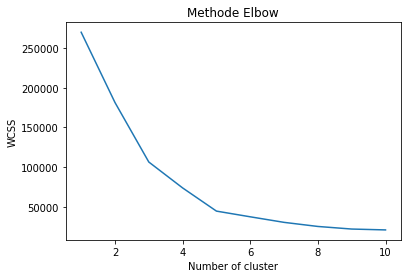

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(X)
    wcss.append(model.inertia_)
# Afficher la courbe
plt.plot(range(1,11), wcss)
plt.title("Methode Elbow")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

### CONSTRUCTION DE MODELE, ENTRAINEMENT ET PREDICTION

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = model.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### VISUALISATION

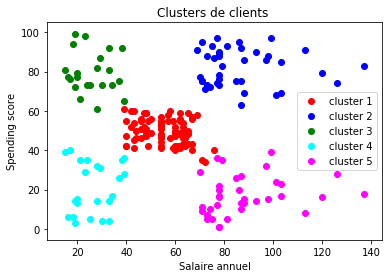

In [13]:
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'cluster 5')
plt.title("Clusters de clients ")
plt.xlabel("Salaire annuel")
plt.ylabel("Spending score")
plt.legend()
plt.show()